In [449]:
import pandas as pd  
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [450]:
df = pd.read_csv("Holiday_Package.csv")

In [451]:
df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [452]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [453]:
df.shape

(872, 7)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [455]:
x=df.describe()
x.round(2)

,Salary,age,educ,no_young_children,no_older_children
count,872.00,872.00,872.00,872.00,872.00
mean,47729.17,39.96,9.31,0.31,0.98
std,23418.67,10.55,3.04,0.61,1.09
min,1322.00,20.00,1.00,0.00,0.00
25%,35324.00,32.00,8.00,0.00,0.00
50%,41903.50,39.00,9.00,0.00,1.00
75%,53469.50,48.00,12.00,0.00,2.00
max,236961.00,62.00,21.00,3.00,6.00


In [456]:
df.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [457]:
df.no_young_children.value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

In [458]:
df.educ.value_counts(normalize=True)

8     0.180046
12    0.142202
9     0.130734
11    0.114679
10    0.103211
5     0.076835
4     0.057339
13    0.049312
7     0.035550
14    0.028670
6     0.024083
15    0.017202
3     0.012615
16    0.011468
2     0.006881
17    0.003440
19    0.002294
21    0.001147
18    0.001147
1     0.001147
Name: educ, dtype: float64

In [459]:
df.no_older_children.value_counts(normalize=True)

0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
6    0.002294
5    0.002294
Name: no_older_children, dtype: float64

In [460]:
cont_var=x.keys()

In [461]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [462]:
df.duplicated().sum() # Check for duplicated rows

0

In [463]:
cont=df.dtypes[(df.dtypes=='float64') | (df.dtypes=='int64')].index
cdf=df[cont]
for i in cdf.columns:
    print("Column name :",i)
    print("\n\n")
    print(df[df[i]==0])

Column name : Salary



Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []
Column name : age



Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []
Column name : educ



Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []
Column name : no_young_children



    Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
1                yes   37207   45     8                  0                  1   
2                 no   58022   46     9                  0                  0   
4                 no   66734   44    12                  0                  2   
5                yes   61590   42    12                  0                  1   
6                 no   94344   51     8                  0                  0   
..               ...     ...  ...   ...             

In [464]:
print("Continous variables : ",cont_var)

Continous variables :  Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')


In [465]:
df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


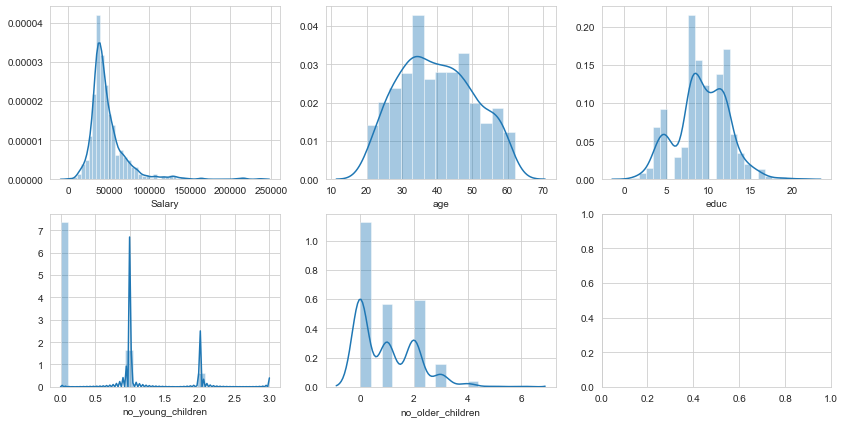

In [466]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3,figsize=(14,7))
sns.distplot(df['Salary'],ax=axes[0,0])
sns.distplot(df['age'],ax=axes[0,1])
sns.distplot(df['educ'],ax=axes[0,2])
sns.distplot(df['no_young_children'],ax=axes[1,0])
sns.distplot(df['no_older_children'],ax=axes[1,1])


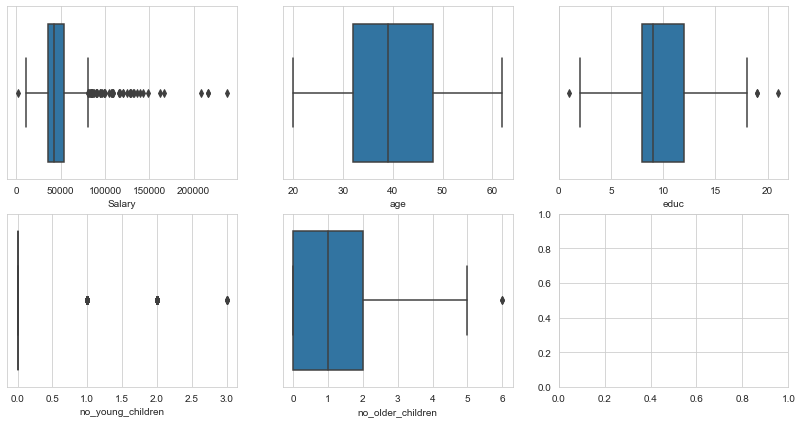

In [467]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(df['Salary'],ax=axes[0,0])
sns.boxplot(df['age'],ax=axes[0,1])
sns.boxplot(df['educ'],ax=axes[0,2])
sns.boxplot(df['no_young_children'],ax=axes[1,0])
sns.boxplot(df['no_older_children'],ax=axes[1,1])

In [468]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [469]:
df.head(1)
cdf=df.drop(['Holliday_Package','no_young_children','no_older_children','foreign'],axis=1)


In [470]:
print(cdf)

     Salary  age  educ
0     48412   30     8
1     37207   45     8
2     58022   46     9
3     66503   31    11
4     66734   44    12
..      ...  ...   ...
867   40030   24     4
868   32137   48     8
869   25178   24     6
870   55958   41    10
871   74659   51    10

[872 rows x 3 columns]


In [471]:

for column in cdf.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

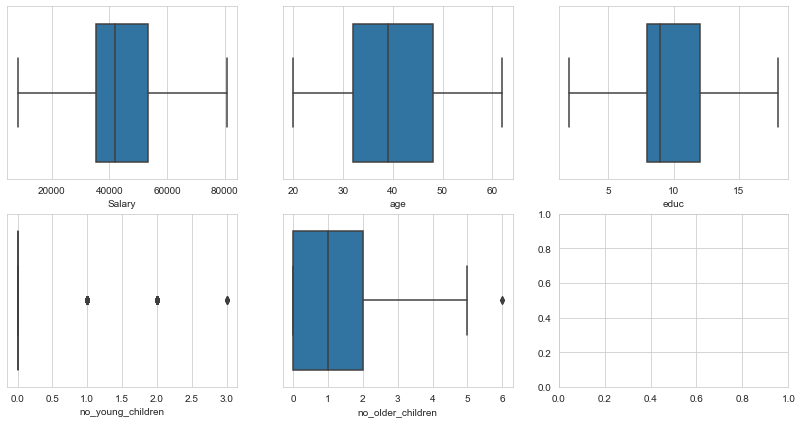

In [472]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(df['Salary'],ax=axes[0,0])
sns.boxplot(df['age'],ax=axes[0,1])
sns.boxplot(df['educ'],ax=axes[0,2])
sns.boxplot(df['no_young_children'],ax=axes[1,0])
sns.boxplot(df['no_older_children'],ax=axes[1,1])

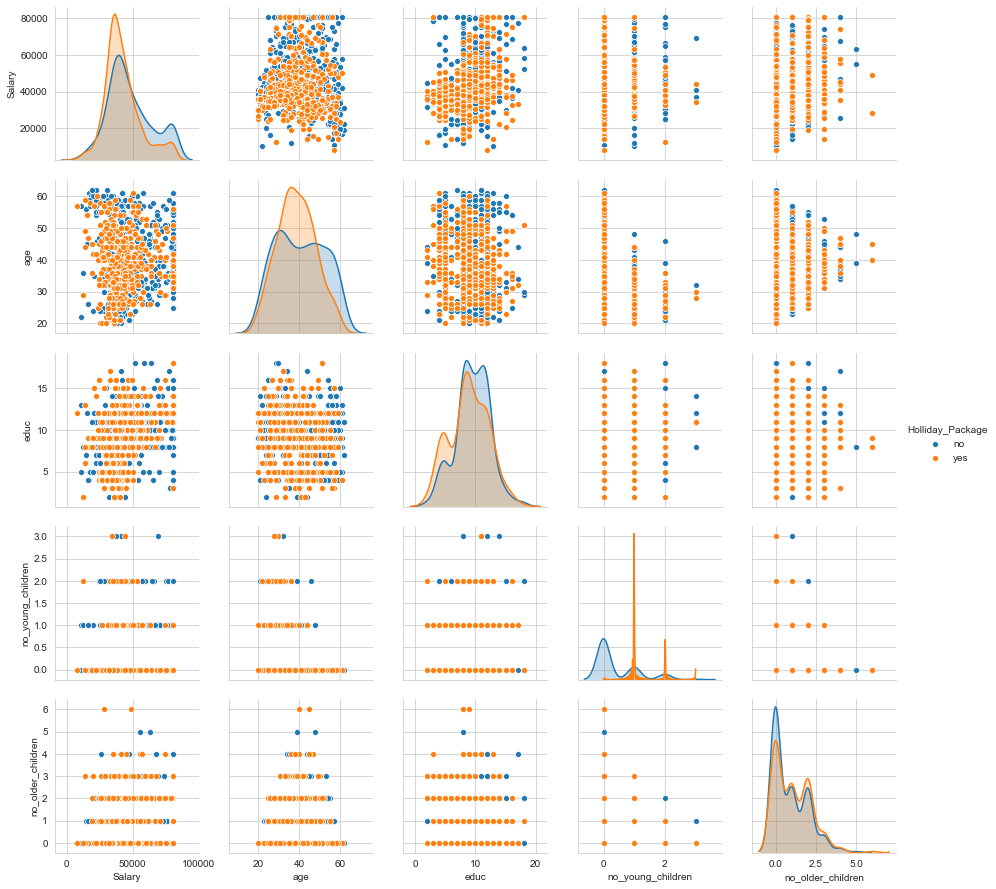

In [473]:
# Pairplot using sns
sns.pairplot(df , hue='Holliday_Package' , diag_kind = 'kde')

In [474]:
df.head(1)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,1,1,no


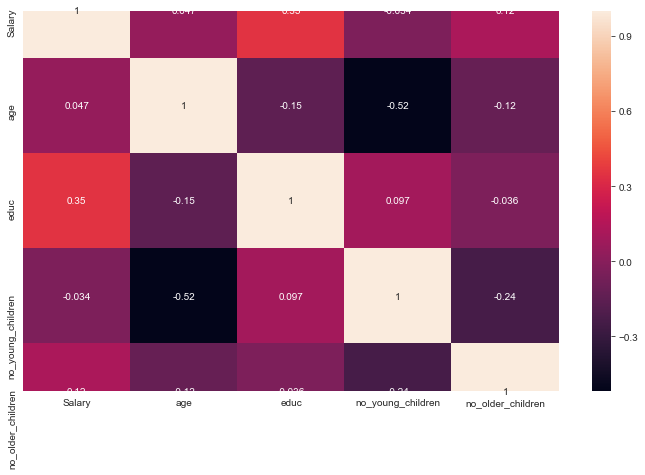

In [475]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:].corr(),annot=True)

In [476]:
df.head(1)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,1,1,no


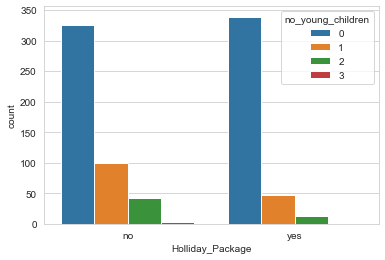

In [477]:
sns.countplot(df['Holliday_Package'],hue=df['no_young_children'])

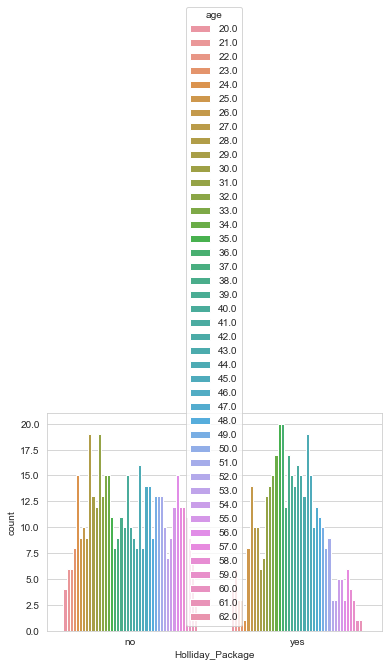

In [478]:
sns.countplot(df['Holliday_Package'],hue=df['age'])

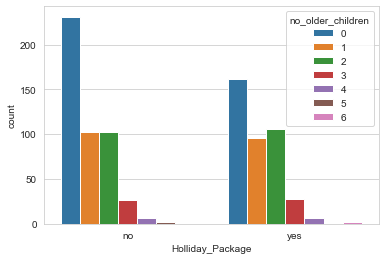

In [479]:
sns.countplot(df['Holliday_Package'],hue=df['no_older_children'])

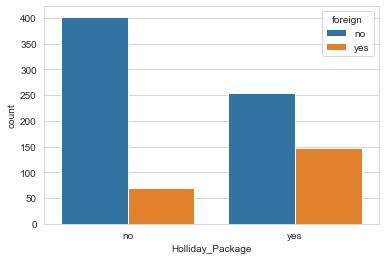

In [480]:
sns.countplot(df['Holliday_Package'],hue=df['foreign'])

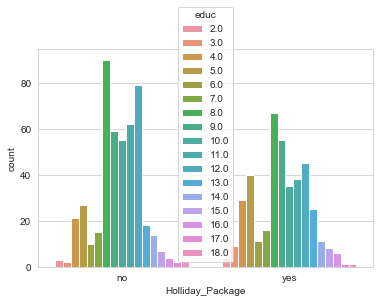

In [481]:
sns.countplot(df['Holliday_Package'],hue=df['educ'])

In [482]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [483]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,1,1,0
1,1,37207.0,45.0,8.0,0,1,0
2,0,58022.0,46.0,9.0,0,0,0
3,0,66503.0,31.0,11.0,2,0,0
4,0,66734.0,44.0,12.0,0,2,0


In [484]:
#df['no_young_children'] = df['no_young_children'].replace({1:0,2:0,3:0, 4:0})
#df['no_older_children'] = df['no_older_children'].replace({2:1,3: 1, 4: 1,5:1,6:1})

In [485]:
df.no_young_children.value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

In [486]:
df.no_older_children.value_counts(normalize=True)

0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
6    0.002294
5    0.002294
Name: no_older_children, dtype: float64

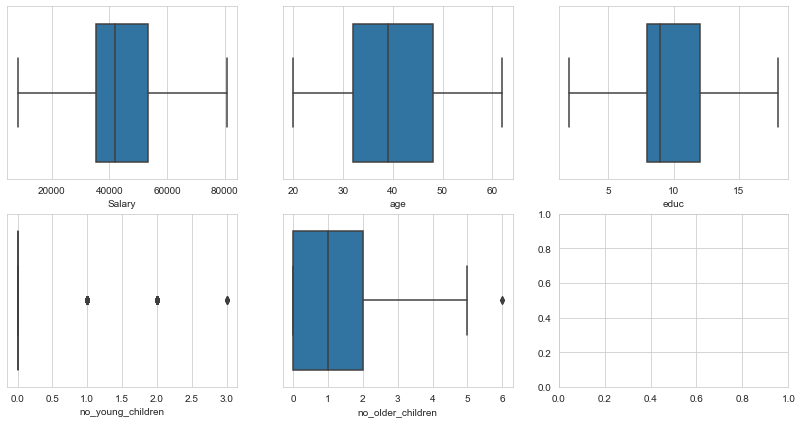

In [487]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,3,figsize=(14,7))
sns.boxplot(df['Salary'],ax=axes[0,0])
sns.boxplot(df['age'],ax=axes[0,1])
sns.boxplot(df['educ'],ax=axes[0,2])
sns.boxplot(df['no_young_children'],ax=axes[1,0])
sns.boxplot(df['no_older_children'],ax=axes[1,1])

In [560]:
X = df.drop(['Holliday_Package','no_young_children','no_older_children'], axis=1) # Independent variables
 
y = df[['Holliday_Package']]  # Labels or dependent variables

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

#### LINEAR DISCRIMINANT ANALYSIS

In [562]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [563]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

In [564]:
ytest_predict_prob=lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.641659,0.358341
1,0.332427,0.667573
2,0.565705,0.434295
3,0.671578,0.328422
4,0.553395,0.446605


#### AUC and ROC for the training data

AUC: 0.654


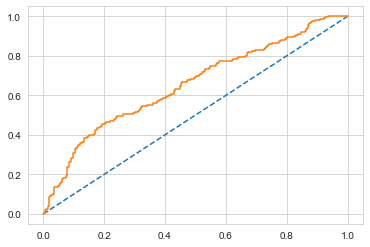

In [565]:
# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr,lda_train_tpr,lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [566]:
# Accuracy - Train Data
lda_train_acc=lda.score(X_train, y_train)
lda_train_acc

0.6377049180327868

In [567]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       326
           1       0.68      0.42      0.52       284

    accuracy                           0.64       610
   macro avg       0.65      0.62      0.61       610
weighted avg       0.65      0.64      0.62       610



In [568]:
confusion_matrix(y_train, ytrain_predict)

array([[271,  55],
       [166, 118]], dtype=int64)

In [569]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
lda_df=pd.DataFrame(lda_metrics).transpose()
lda_train_recall=round(lda_df.loc["1"][1],2)
lda_train_f1=round(lda_df.loc["1"][2],2)
lda_train_precision=round(lda_df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
print('LDA TRAIN AUC: %.3f' % lda_train_auc)
print('LDA Train Accuracy :%.3f'% lda_train_acc)

lda_train_precision  0.68
lda_train_recall  0.42
lda_train_f1  0.52
LDA TRAIN AUC: 0.654
LDA Train Accuracy :0.638


#### AUC and ROC for the test data

AUC: 0.653


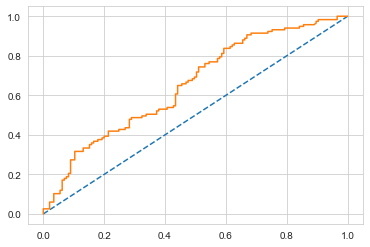

In [570]:
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [571]:
# Accuracy - Test Data
lda_test_acc=lda.score(X_test, y_test)
lda_test_acc

0.6145038167938931

In [572]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       145
           1       0.60      0.42      0.49       117

    accuracy                           0.61       262
   macro avg       0.61      0.60      0.59       262
weighted avg       0.61      0.61      0.60       262



In [573]:
confusion_matrix(y_test, ytest_predict)

array([[112,  33],
       [ 68,  49]], dtype=int64)

In [574]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lda_df=pd.DataFrame(lda_metrics).transpose()
lda_test_recall=round(lda_df.loc["1"][1],2)
lda_test_f1=round(lda_df.loc["1"][2],2)
lda_test_precision=round(lda_df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)
print('LDA TEST AUC: %.3f' % lda_test_auc)
print('LDA Test Accuracy :%.3f'% lda_test_acc)

lda_test_precision  0.6
lda_test_recall  0.42
lda_test_f1  0.49
LDA TEST AUC: 0.653
LDA Test Accuracy :0.615


# LOGISTIC REGRESSION

In [575]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [576]:
# Fit the Logistic Regression logreg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting labels on Train and Test data

In [577]:
ytrain_predict = logreg.predict(X_train)
ytest_predict = logreg.predict(X_test)

#### Getting the Predicted Classes and Probs

In [578]:
ytest_predict_prob=logreg.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.612633,0.387367
1,0.532652,0.467348
2,0.553336,0.446664
3,0.623807,0.376193
4,0.510097,0.489903


#### Model Evaluation

In [579]:
# Accuracy - Training Data
logreg.score(X_train, y_train)

0.5245901639344263

#### AUC and ROC for the training data

AUC: 0.572


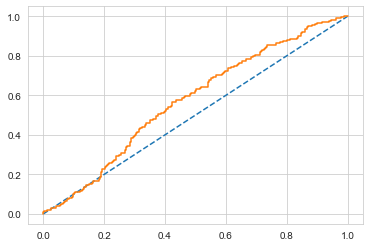

In [580]:
# predict probabilities
probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
logreg_train_fpr, logreg_train_tpr, logreg_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_train_fpr, logreg_train_tpr)

In [581]:
# Accuracy - Train Data


In [582]:
logreg_train_acc=logreg.score(X_train, y_train) 
logreg_train_acc

0.5245901639344263

In [583]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.94      0.68       326
           1       0.42      0.05      0.09       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.39       610
weighted avg       0.48      0.52      0.41       610



In [584]:
logreg_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
logreg_df=pd.DataFrame(logreg_metrics).transpose()
logreg_train_recall=round(logreg_df.loc["1"][1],2)
logreg_train_f1=round(logreg_df.loc["1"][2],2)
logreg_train_precision=round(logreg_df.loc["1"][0],2)
print ('logreg_train_precision ',logreg_train_precision)
print ('logreg_train_recall ',logreg_train_recall)
print ('logreg_train_f1 ',logreg_train_f1)
print('AUC: %.3f' % logreg_train_auc)
print('Train Accuracy :%.3f'% logreg_train_acc)

logreg_train_precision  0.42
logreg_train_recall  0.05
logreg_train_f1  0.09
AUC: 0.572
Train Accuracy :0.525


#### AUC and ROC for the test data

AUC: 0.614


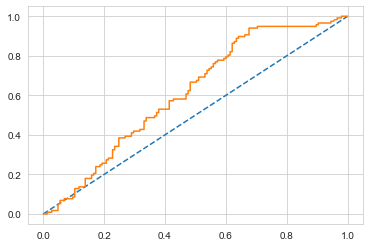

In [585]:
# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
logreg_test_fpr, logreg_test_tpr, logreg_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logreg_test_fpr, logreg_test_tpr)

In [586]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[137,   8],
       [111,   6]], dtype=int64)

In [587]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70       145
           1       0.43      0.05      0.09       117

    accuracy                           0.55       262
   macro avg       0.49      0.50      0.39       262
weighted avg       0.50      0.55      0.43       262



In [588]:
#Test Data Accuracy
logreg_test_acc=logreg.score(X_test,y_test)
logreg_test_acc

0.5458015267175572

In [589]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70       145
           1       0.43      0.05      0.09       117

    accuracy                           0.55       262
   macro avg       0.49      0.50      0.39       262
weighted avg       0.50      0.55      0.43       262



In [590]:
logreg_metrics=classification_report(y_test, ytest_predict,output_dict=True)
logreg_df=pd.DataFrame(logreg_metrics).transpose()
logreg_test_recall=round(logreg_df.loc["1"][1],2)
logreg_test_f1=round(logreg_df.loc["1"][2],2)
logreg_test_precision=round(logreg_df.loc["1"][0],2)
print ('logreg_test_precision ',logreg_test_precision)
print ('logreg_test_recall ',logreg_test_recall)
print ('logreg_test_f1 ',logreg_test_f1)
print('AUC: %.3f' % logreg_test_auc)
print('Test Accuracy :%.3f'% logreg_test_acc)

logreg_test_precision  0.43
logreg_test_recall  0.05
logreg_test_f1  0.09
AUC: 0.614
Test Accuracy :0.546


In [591]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Reg Train':[logreg_train_acc,logreg_train_auc,logreg_train_recall,logreg_train_precision,logreg_train_f1],
        'Logistic Reg Test':[logreg_test_acc,logreg_test_auc,logreg_test_recall,logreg_test_precision,logreg_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic Reg Train,Logistic Reg Test,LDA Train,LDA Test
Accuracy,0.52,0.55,0.64,0.61
AUC,0.57,0.61,0.65,0.65
Recall,0.05,0.05,0.42,0.42
Precision,0.42,0.43,0.68,0.60
F1 Score,0.09,0.09,0.52,0.49


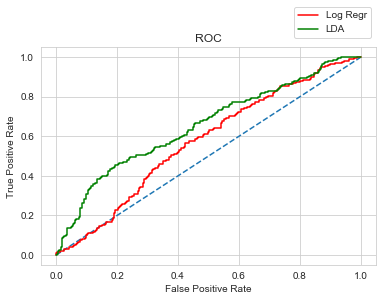

In [592]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logreg_train_fpr, logreg_train_tpr,color='red',label="Log Regr")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')


In [593]:
logreg.coef_


array([[-9.22298904e-06,  2.99475012e-03,  1.07729439e-02,
         9.25569115e-03]])

In [594]:
lda.coef_

array([[-1.56089037e-05, -1.24750416e-02,  5.47991783e-02,
         1.34935600e+00]])

In [595]:
X_train.head(1)

,Salary,age,educ,foreign
502,34017.0,57.0,5.0,0


In [596]:
lda.explained_variance_ratio_

array([1.])